# Experiment 5: Rat mapping with priors (2D)

In this tutorial, we will use the `optim-neurostim` library to perform 2D rat mapping with priors.

## Step 1: Download dependencies

In [1]:
from IPython.display import Image, display
from PIL import Image as PIL_Image
import pickle
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'size': 16} 
matplotlib.rc('font', **font)

#from data import Subject

In [2]:
%cd ..

C:\Users\p117258\Documents\GitHub\EduOptimNeurostim


In [ ]:
#!pip install GPy

## Step 2: Download the dataset

In [ ]:
!bash scripts/download_nhp_rat_dataset.sh data

## Step 3: Configuration file

In `optim-neurostim`, the training is orchestrated by a configuration file, a JSON file containing all the necessary parameters. In-depth documentation on using the configuration file is available [here](TODO). Some examples of configuration files are available in the `optim-neurostim/examples/` folder [here](TODO).

In this tutorial for Experiment 1, we will be using the configuration file: `optim-neurostim/examples/rat_mapping_2D.json`. This is already downloaded for you and can be seen under Colab's `Files` (📁) tab on the left.

Open this file and check our repo `Readme` for more information on some of the key parameters.

## (Optional) Step 4: Play around with parameters

Optionally, you can open `examples/rat_mapping_2D.json` in Colab and manually change any parameter you want before running the experiment. You can even create a config file from scratch if you wish to explore further!

## Step 5: Run optimization on one new animal

Using the given config file and given that the best hyperparameter value for `kappa` is $3.0$, let's first run optimization on one new animal. We do this by passing `"{'kappa': 3.0}"` or equivalently `output/rat_mapping_2D_with_prior/best_hyperparams.pkl` (i.e. path to the trained hyperparameter object) to the `-hp` flag.

## Without Prior

In [3]:
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

!python main.py -c config/rat_mapping_2D.json \
                -nm 1 \
                -op output/rat_mapping_2D_one_animal \
                -hp "{'kappa': 3.0}" \
                -val \
                -gpu \
                -s 100

Using device=cpu
Dataset (sub:muscle):  ['rat6_M1_200218:3']
Hooray! Succesfully saved output files to output/rat_mapping_2D_one_animal.



Iterating over muscles: 100%|##########| 1/1 [01:30<00:00, 90.97s/it]


In [4]:
df_gpbo = pd.read_csv('output/rat_mapping_2D_one_animal/gpbo_performance.csv', index_col='queries')
df_gpbo = df_gpbo[['exploration', 'exploitation']].T
df_gpbo

queries,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
exploration,0.203279,0.300931,0.272038,0.292734,0.316822,0.357698,0.372823,0.396629,0.433762,0.513185,...,0.705072,0.760734,0.779283,0.773107,0.780768,0.791335,0.801989,0.825713,0.794793,0.839556
exploitation,0.203279,0.296499,0.220761,0.231547,0.228257,0.289951,0.191355,0.219756,0.217888,0.353103,...,0.592024,0.588935,0.574139,0.649342,0.654103,0.717679,0.688990,0.757470,0.787129,0.797133


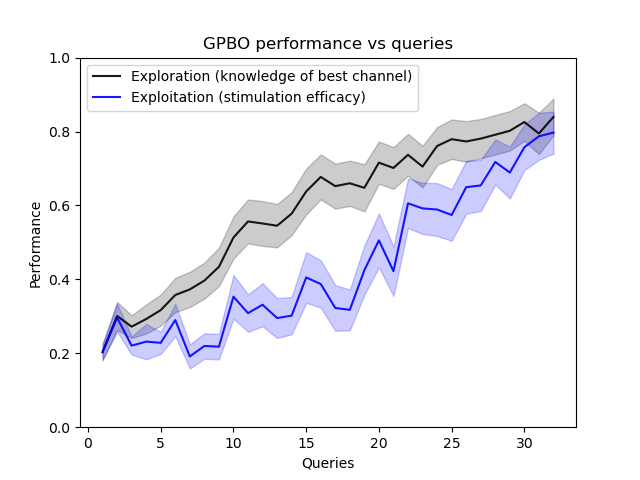

In [5]:
display(Image('output/rat_mapping_2D_one_animal/performance_vs_queries.png'))

## With Prior

In [6]:
!python main.py -c config/rat_mapping_2D_with_prior.json \
                -nm 1 \
                -op output/rat_mapping_2D_with_prior_one_animal \
                -hp "{'kappa': 3.0}" \
                -val \
                -gpu \
                -s 100

Using device=cpu
Dataset (sub:muscle):  ['rat3_M1_190728:0']
Hooray! Succesfully saved output files to output/rat_mapping_2D_with_prior_one_animal.



Iterating over muscles: 100%|##########| 1/1 [01:41<00:00, 101.01s/it]


In [7]:
df_gpbo = pd.read_csv('output/rat_mapping_2D_with_prior_one_animal/gpbo_performance.csv', index_col='queries')
df_gpbo = df_gpbo[['exploration', 'exploitation']].T
df_gpbo

queries,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
exploration,0.526787,0.717211,0.698788,0.675365,0.543296,0.566054,0.568992,0.559757,0.559757,0.589273,...,0.819128,0.831390,0.795184,0.823086,0.809821,0.847932,0.849607,0.860883,0.850047,0.843910
exploitation,0.526787,0.717211,0.493649,0.632703,0.160295,0.342773,0.318519,0.342546,0.256137,0.482921,...,0.743160,0.794718,0.808397,0.756650,0.753145,0.764455,0.829058,0.814939,0.843741,0.831376


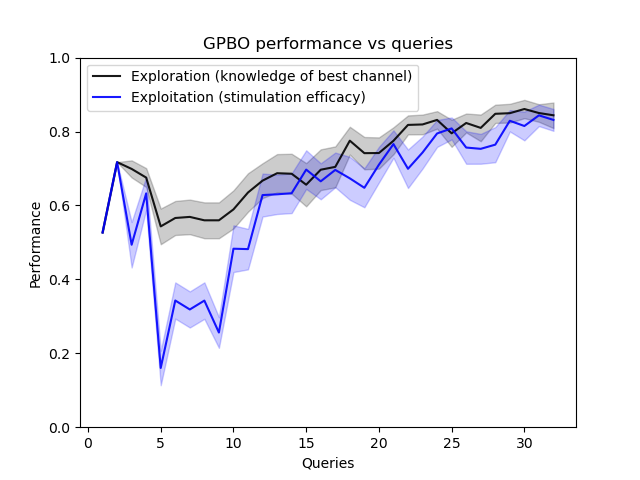

In [8]:
display(Image('output/rat_mapping_2D_with_prior_one_animal/performance_vs_queries.png'))

Now, let's run the same pipeline, but using the **extensive** search algorithm instead of the **GPBO** search algorithm as employed before.

In [9]:
!python main.py -c config/rat_mapping_2D_with_prior.json \
                -nm 1 \
                -alg extensive \
                -op output/rat_mapping_2D_with_prior_one_animal_extensive \
                -hp "{'kappa': 3.0}" \
                -val \
                -s 100

Dataset (sub:muscle):  ['rat3_M1_190728:0']
Hooray! Succesfully saved output files to output/rat_mapping_2D_with_prior_one_animal_extensive.



Iterating over muscles: 100%|##########| 1/1 [00:00<00:00,  6.62it/s]


We can quickly check the performance through the saved CSV file.

In [10]:
df_extensive = pd.read_csv('output/rat_mapping_2D_with_prior_one_animal_extensive/extensive_performance.csv', index_col='queries')
df_extensive = df_extensive[['exploration', 'exploitation']].T
df_extensive

queries,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
exploration,0.526787,0.523550,0.769513,0.744944,0.767454,0.767454,0.844244,0.844244,0.740674,0.765668,...,0.526649,0.526649,0.526649,0.526649,0.526649,0.526649,0.494214,0.494214,0.462902,0.462902
exploitation,0.526787,0.519849,0.911863,0.686051,0.731960,0.171421,1.000000,0.499706,0.552776,0.890338,...,0.076933,0.294265,0.195928,0.281947,0.397596,0.194928,0.041184,0.000000,0.060618,0.044757


Let's see what algorithmic performance vs. num. queries looks like. This is essentially the same as the CSV above, but plotted nicely with error bars.

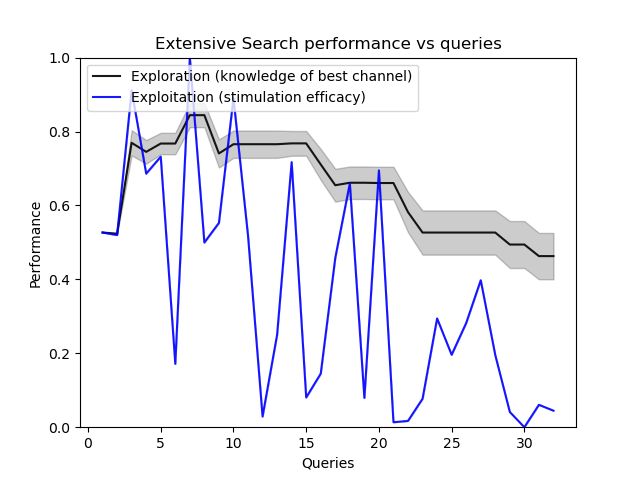

In [11]:
display(Image('output/rat_mapping_2D_with_prior_one_animal_extensive/performance_vs_queries.png'))

Now, let's run the same pipeline, but using the **greedy** search algorithm instead of the **GPBO** search algorithm as employed before.

In [12]:
!python main.py -c config/rat_mapping_2D_with_prior.json \
                -nm 1 \
                -alg greedy \
                -op output/rat_mapping_2D_with_prior_one_animal_greedy \
                -hp "{'kappa': 3.0}" \
                -val \
                -s 100

Dataset (sub:muscle):  ['rat3_M1_190728:0']
Hooray! Succesfully saved output files to output/rat_mapping_2D_with_prior_one_animal_greedy.



Iterating over muscles: 100%|##########| 1/1 [00:00<00:00,  5.39it/s]


In [13]:
df_greedy = pd.read_csv('output/rat_mapping_2D_with_prior_one_animal_greedy/greedy_performance.csv', index_col='queries')
df_greedy = df_greedy[['exploration', 'exploitation']].T
df_greedy

queries,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
exploration,0.526787,0.585495,0.609300,0.661182,0.676353,0.666056,0.660079,0.662741,0.682632,0.634203,...,0.655066,0.685619,0.662933,0.686868,0.680657,0.674168,0.689076,0.650236,0.661577,0.669981
exploitation,0.526787,0.523660,0.482502,0.623592,0.434035,0.359400,0.568348,0.362332,0.396085,0.251235,...,0.514280,0.528537,0.473594,0.415635,0.481408,0.516563,0.506645,0.475903,0.514073,0.530471


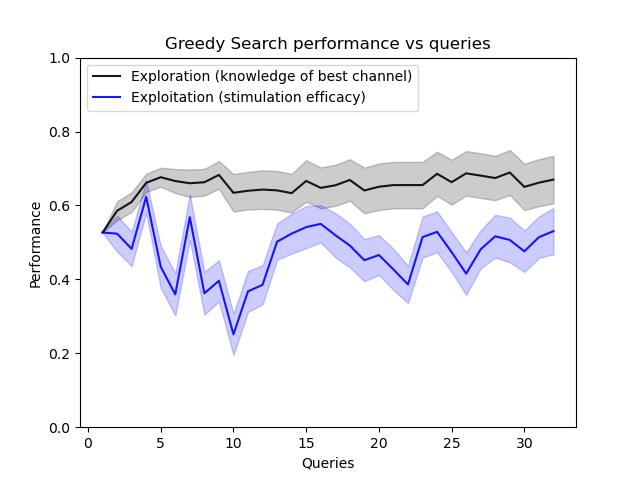

In [14]:
display(Image('output/rat_mapping_2D_with_prior_one_animal_greedy/performance_vs_queries.png'))

Finally, we can compare the three algorithms on the same plot for (i) exploration and (ii) exploitation using the command given below.

In [15]:
!python scripts/compare_and_plot.py -r1 output/rat_mapping_2D_with_prior_one_animal \
                                    -r2 output/rat_mapping_2D_with_prior_one_animal_extensive \
                                    -r3 output/rat_mapping_2D_with_prior_one_animal_greedy

Hooray! Successfully compared and plotted the runs!


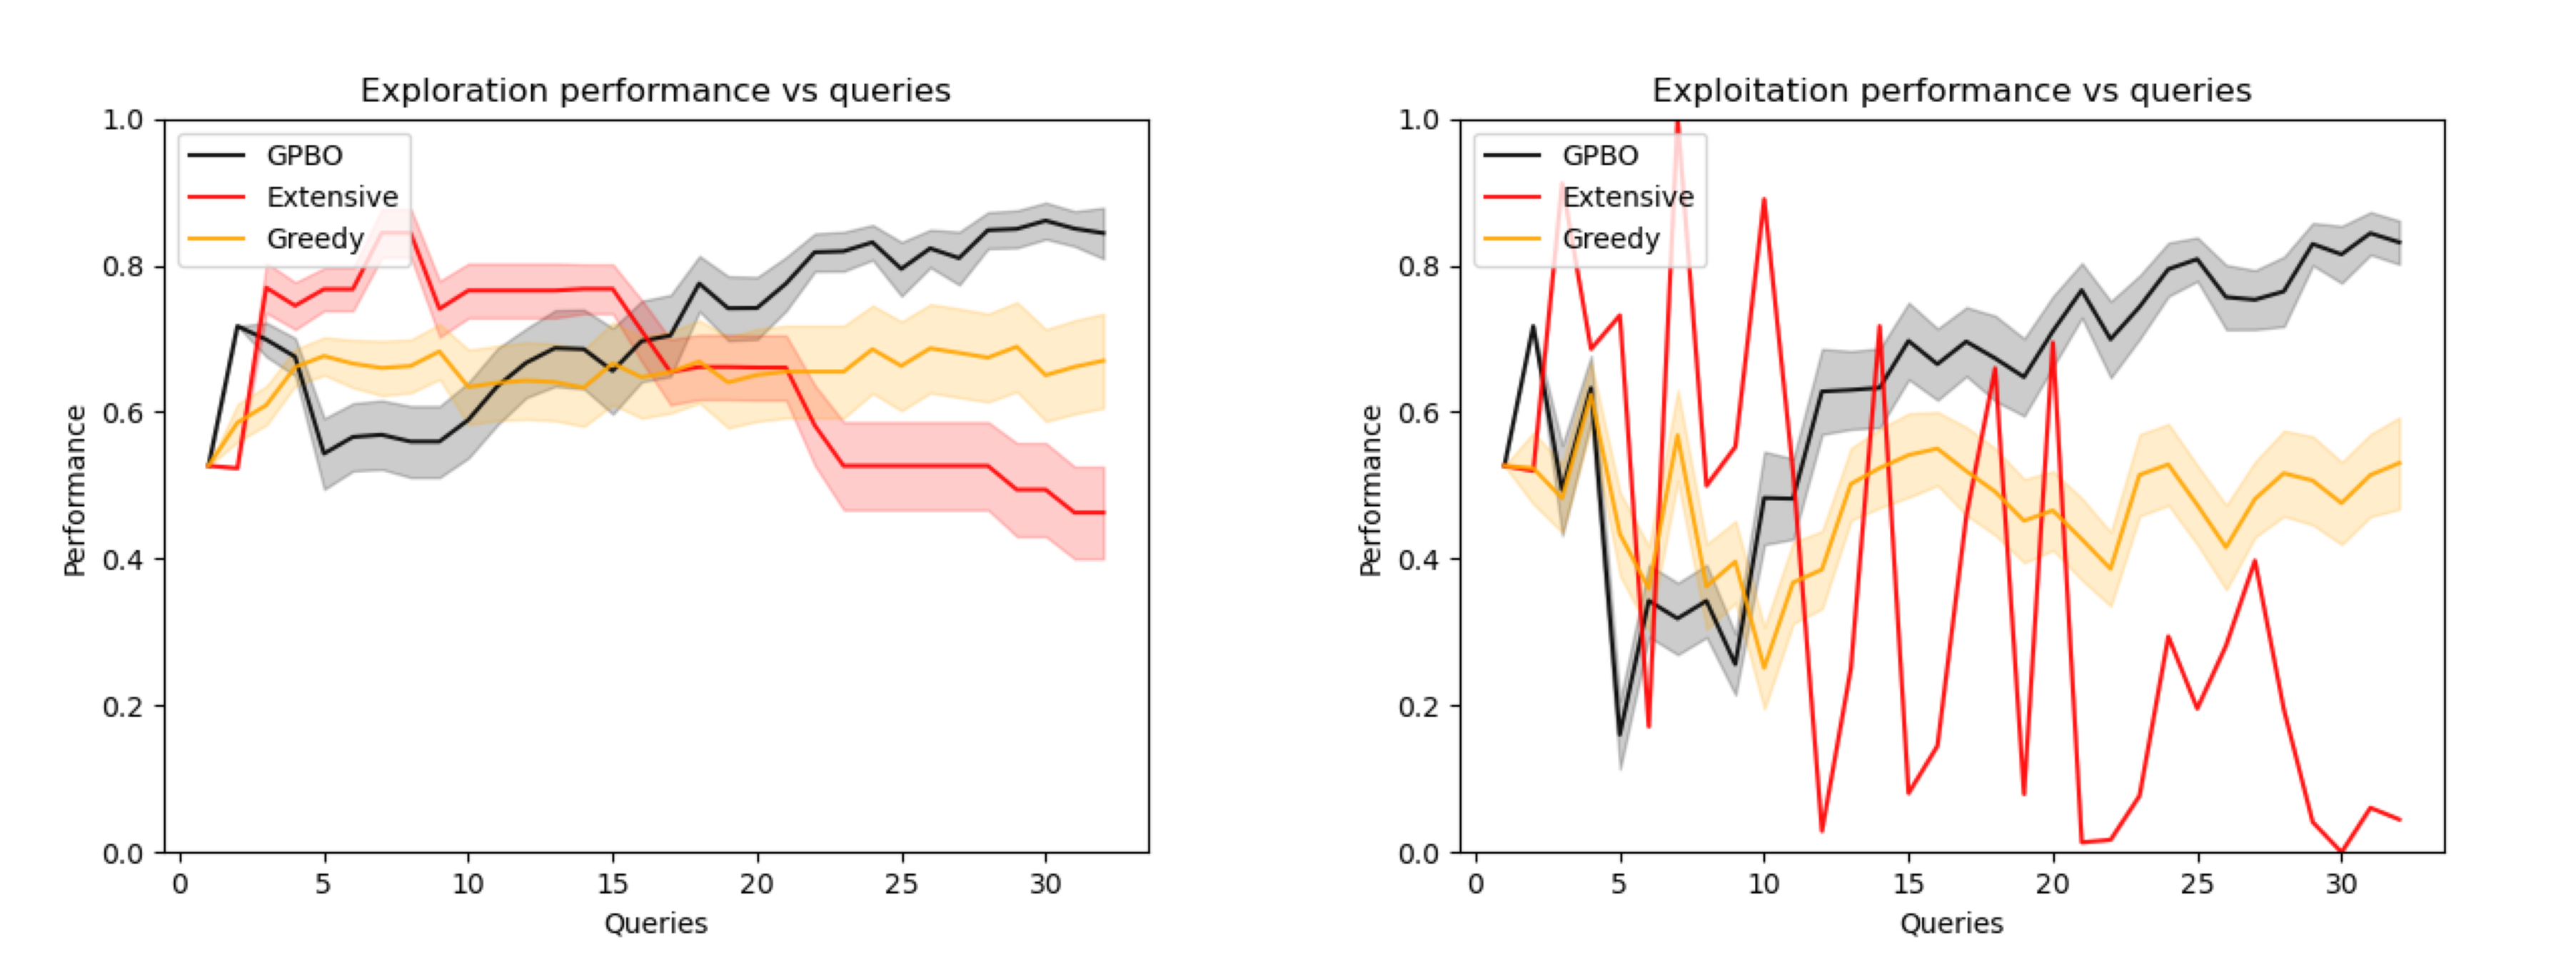

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/rat_mapping_2D_with_prior_one_animal/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/rat_mapping_2D_with_prior_one_animal/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Running validation on all replicates

In [4]:
!python main.py -c config/rat_mapping_2D_with_prior.json \
                -op output/rat_mapping_2D_with_prior_all \
                -hp "{'kappa': 2.5}" \
                -gpu \
                -val \

Using device=cpu
Dataset (sub:muscle):  ['rat5_M1_191112:0', 'rat3_M1_190728:0', 'rat2_M1_190617:0', 'rat1_M1_190716:0', 'rat6_M1_200218:0', 'rat4_M1_191109:0']
Iterating over muscles: 100%|█████████████████████| 6/6 [05:35<00:00, 55.90s/it]
Hooray! Succesfully saved output files to output/rat_mapping_2D_with_prior_all.


In [5]:
!python main.py -c config/rat_mapping_2D_with_prior.json \
                -alg extensive \
                -op output/rat_mapping_2D_with_prior_all_extensive \
                -gpu \
                -val \

Using device=cpu
Dataset (sub:muscle):  ['rat5_M1_191112:0', 'rat3_M1_190728:0', 'rat2_M1_190617:0', 'rat1_M1_190716:0', 'rat6_M1_200218:0', 'rat4_M1_191109:0']
Iterating over muscles: 100%|█████████████████████| 6/6 [00:00<00:00,  6.04it/s]
Hooray! Succesfully saved output files to output/rat_mapping_2D_with_prior_all_extensive.


In [6]:
!python main.py -c config/rat_mapping_2D_with_prior.json \
                -alg greedy \
                -op output/rat_mapping_2D_with_prior_all_greedy \
                -gpu \
                -val \

Using device=cpu
Dataset (sub:muscle):  ['rat5_M1_191112:0', 'rat3_M1_190728:0', 'rat2_M1_190617:0', 'rat1_M1_190716:0', 'rat6_M1_200218:0', 'rat4_M1_191109:0']
Iterating over muscles: 100%|█████████████████████| 6/6 [00:01<00:00,  4.60it/s]
Hooray! Succesfully saved output files to output/rat_mapping_2D_with_prior_all_greedy.


In [7]:
!python scripts/compare_and_plot.py -r1 output/rat_mapping_2D_with_prior_all \
                                    -r2 output/rat_mapping_2D_with_prior_all_extensive \
                                    -r3 output/rat_mapping_2D_with_prior_all_greedy

Hooray! Successfully compared and plotted the runs!


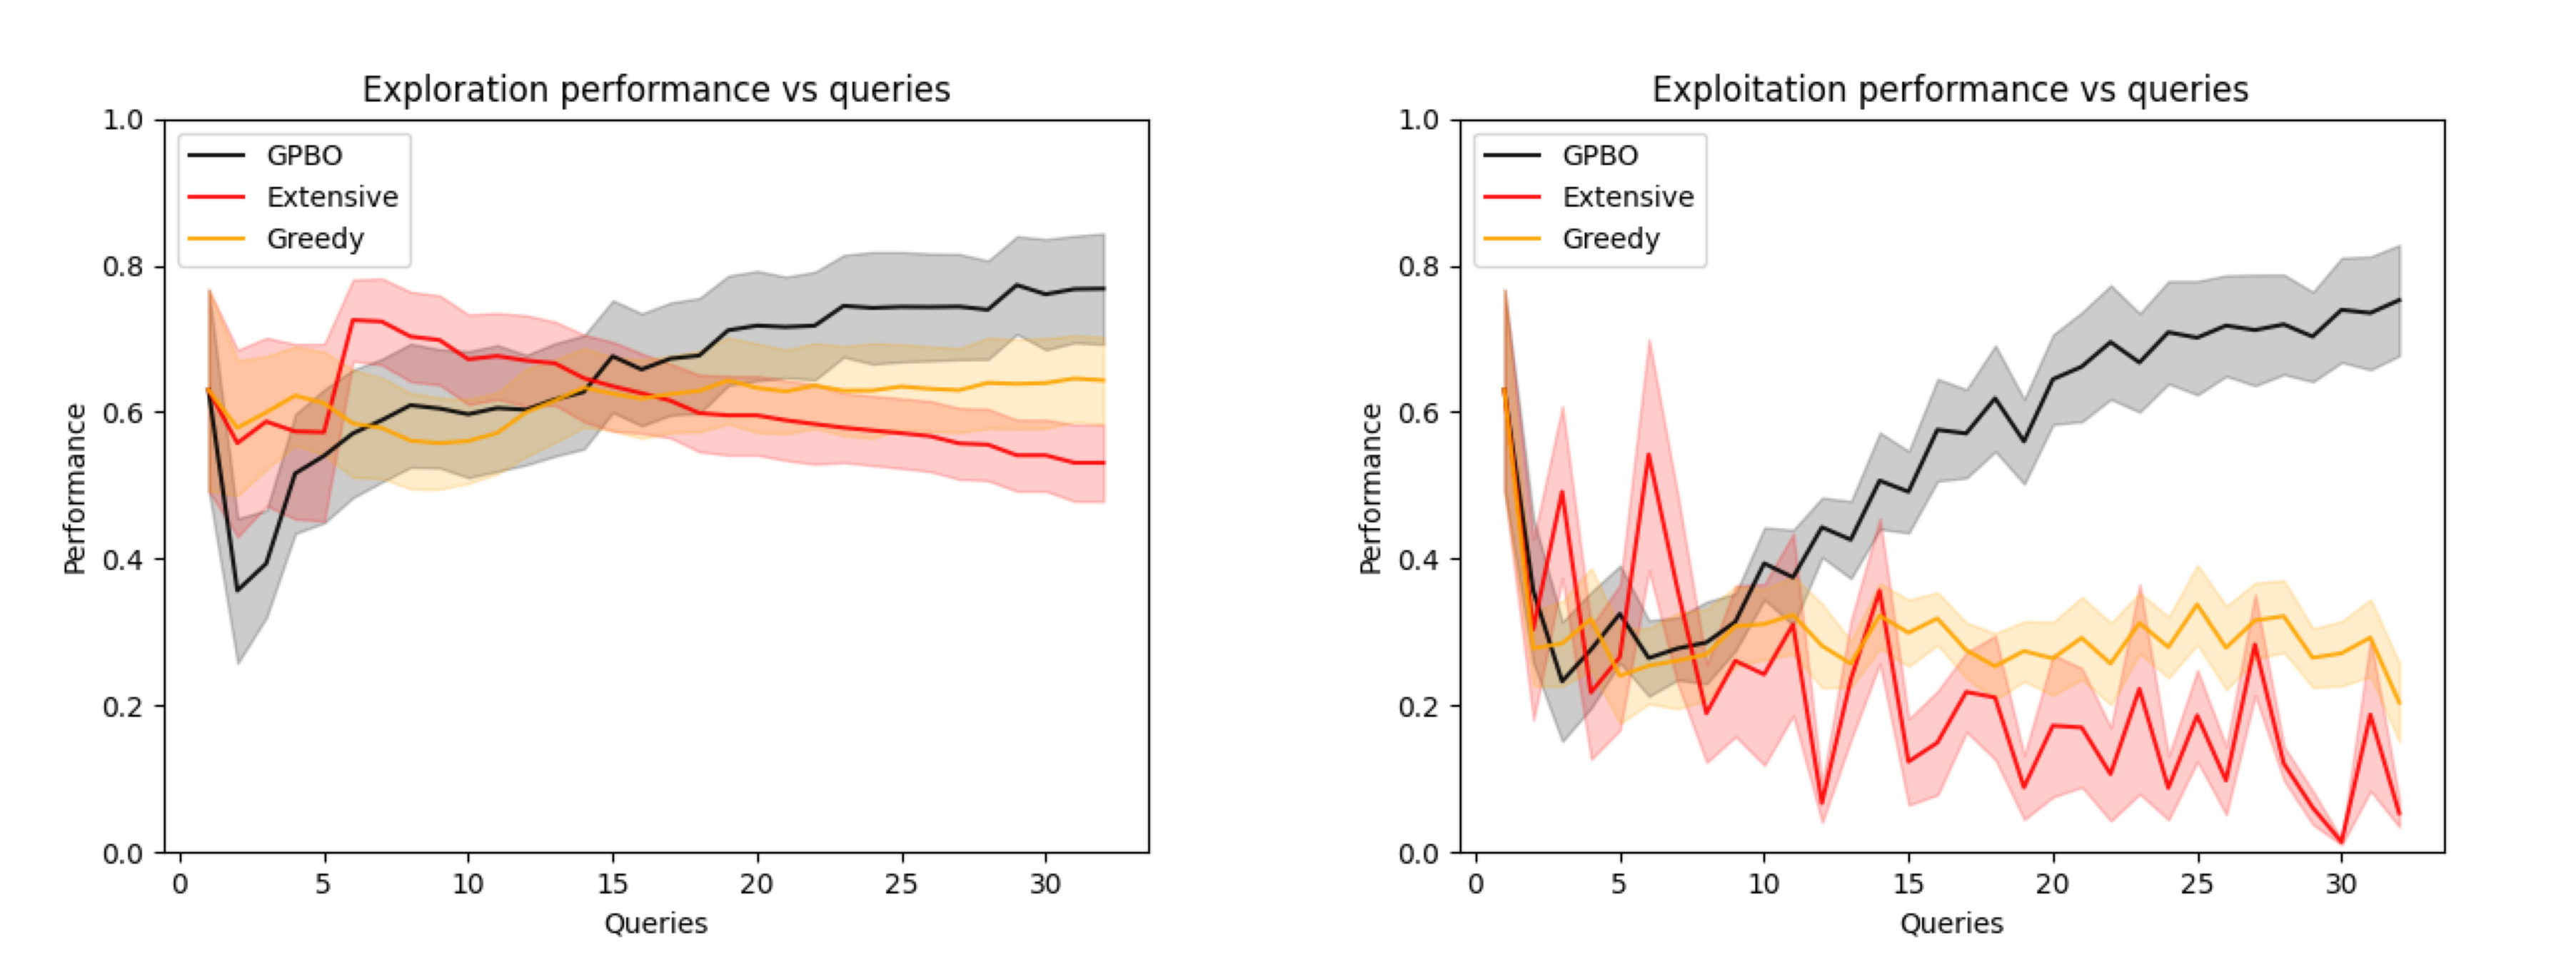

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(50, 30), constrained_layout=True)
ax[0].imshow(PIL_Image.open('output/rat_mapping_2D_with_prior_all/exploration_comparison.png'))
ax[0].axis('off')
ax[1].imshow(PIL_Image.open('output/rat_mapping_2D_with_prior_all/exploitation_comparison.png'))
ax[1].axis('off')
plt.show()

## Step 7: Run offline hyperpamater optimization

Now that we saw how `optim-neurostim` can be utilized to run validation experiments, let's see how we decided on the best value for `kappa`. Now, we will run the command without any additional flags to perform offline hyperparameter optimization. As discussed before, the config file encodes all of the necessary information.

In [18]:
!python main.py -c config/rat_mapping_2D_with_prior.json \
                -gpu \
                -op output/rat_mapping_2D_with_prior \

Using device=cpu
Dataset (sub:muscle):  ['rat5_M1_191112:0', 'rat3_M1_190728:0', 'rat2_M1_190617:0', 'rat1_M1_190716:0', 'rat6_M1_200218:0', 'rat4_M1_191109:0']
Hooray! Succesfully saved output files to output/rat_mapping_2D_with_prior.     


Let's first see what the algorithmic performance looks like for different values of hyperparameter `kappa`.

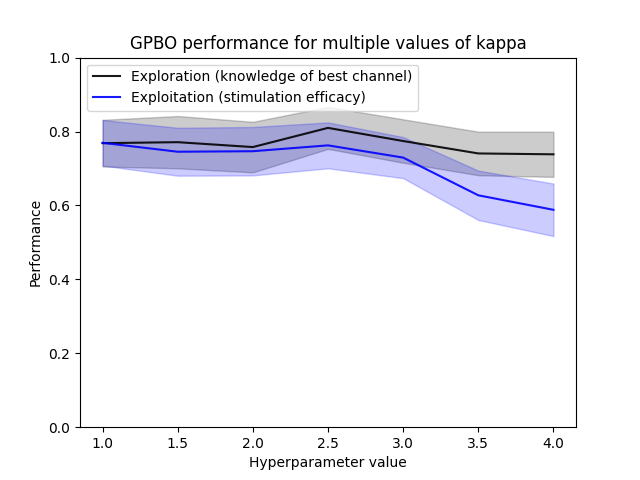

In [19]:
display(Image('output/rat_mapping_2D_with_prior/performance_for_kappa.png'))

This command also gives us a `.pkl` containing the best values for hyperparameters which we can pass onto validation experiments later. Let's investigate this below.

In [20]:
with open('output/rat_mapping_2D_with_prior/best_hyperparams.pkl', 'rb') as f:
    d = pickle.load(f)

print(d)

{'kappa': 2.5}
